# PROBLEM 1

In [1]:
import numpy as np
import pandas as pd

class ScratchLinearRegression():  
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        if self.no_bias != True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]]) 
        return X
        
    def fit(self, X, y, X_val=None, y_val=None):
        
        X = self._linear_hypothesis(X)
        y = np.resize(y,X.shape)
        
        X_mean = X.mean()
        y_mean = y.mean()
        # X - X_mean
        part_1 = X-X_mean
        # y - y_mean
        part_2 = y-y_mean
        
        covariance = np.sum(part_1 * part_2)
        variance = np.sum(part_1**2)
        
        # calculating the last values of the formula
        B1 = covariance/variance
        B0 = y_mean - np.multiply(B1,X_mean)
        
        self.B1 = B1
        self.B0 = B0
        self.coef_ = [self.B0,self.B0]
        self.n = len(X)
        
        if (X_val is not None) and (y_val is not None): 
            val_X = self._linear_hypothesis(X_val)
            val_y = np.resize(y_val,val_X.shape)

            val_X_mean = val_X.mean()
            val_y_mean = val_y.mean()
            # X - X_mean
            val_part_1 = val_X-val_X_mean
            # y - y_mean
            val_part_2 = val_y-val_y_mean

            val_covariance = np.sum(val_part_1 * val_part_2)
            val_variance = np.sum(val_part_1**2)

            # calculating the last values of the formula
            val_B1 = val_covariance/val_variance
            val_B0 = val_y_mean - np.multiply(val_B1,val_X_mean)

            self.val_B1 = val_B1
            self.val_B0 = val_B0
            self.val_X = val_X
            self.val_y = val_y
            # temp prediction for gradient descent
            self._gradient_descent(X, y)
        
        if self.verbose:
            #verboseToTrue When set to, the learning process is output
            print("loss {}, val loss {}".format(self.loss, self.val_loss))
        pass
        
    def predict(self, X):
        predictions = self.B0 + np.multiply(self.B1,X)
        self.y_pred = predictions
        pass
        return predictions
    
    # problem 2
    def _gradient_descent(self, X, y):
        b1 = self.B1
        b0 = self.B0
        val_b1 = self.val_B1
        val_b0 = self.val_B0
        n = self.n
        
        for i in range(self.iter):
            temp_predictions = b0 - np.multiply(b1,X)
            error = y-temp_predictions
            val_temp_predictions = val_b0 - np.multiply(val_b1,self.val_X)
            val_error = self.val_y - val_temp_predictions
            
            # for train
            b1 = b1 - self.lr
            b0 = b0 - self.lr
            
            # for validation
            val_b1 = val_b1 - self.lr
            val_b0 = val_b0 - self.lr
            
            self.loss[i] = ((error)**2).mean()
            self.val_loss[i] = ((val_error)**2).mean()

# PROBLEM 1


Assumption function

In [150]:
X0 = np.random.random_sample((20,5))
X1 = np.random.random_sample((20,5))
X = np.concatenate([X0,X1],axis=1)
X.shape

(20, 10)

In [111]:
y0 = np.random.random_sample((20,5))
y1 = np.random.random_sample((20,5))
y = np.concatenate([X0,X1],axis=1)
y.shape

(20, 10)

In [152]:
theta = np.random.random_sample(10)

In [153]:
np.dot(X,theta)

array([3.35818595, 4.84222001, 4.67647035, 4.5783861 , 4.16024077,
       3.51277318, 3.57665326, 3.6966569 , 3.15074325, 2.26442072,
       3.6402281 , 3.80175175, 3.59141538, 3.4799418 , 2.99644227,
       3.08744329, 3.30944791, 4.49998978, 2.3005852 , 3.07543796])

# PROBLEM 2

Gradient descent

It's implement in scratch class above

# PROBLEM 3

Estimations

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=10, lr=0.08, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)
y_pred

array([[0.50293397, 0.47456381, 0.4659914 , 0.47635163, 0.48890809,
        0.49191002, 0.46778457, 0.46527901, 0.47514298, 0.46942927],
       [0.48868986, 0.50231561, 0.50202387, 0.50095547, 0.49286495,
        0.4680672 , 0.49247822, 0.48348084, 0.46502776, 0.50167191],
       [0.49054134, 0.46470985, 0.50462858, 0.47409334, 0.49173794,
        0.48277989, 0.46942949, 0.48377186, 0.48984893, 0.47505739],
       [0.49251203, 0.46760623, 0.48441306, 0.46964513, 0.47581132,
        0.49444612, 0.48951296, 0.46898574, 0.48573488, 0.49832827]])

In [161]:
# checking with the actual linear regression
from sklearn.linear_model import LinearRegression

l_regressor = LinearRegression()
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)
y_pred

array([[ 0.5507804 ,  1.11477641,  0.61522761,  0.64524425,  0.56848841,
         0.61682202,  0.47029458,  0.76687394,  0.93633046,  0.01393188],
       [ 0.58061732,  0.43127762,  0.57700917,  0.09284544,  0.82577193,
         0.51582454,  0.01506331,  0.25352399,  0.92313409,  0.36388625],
       [ 0.5051658 ,  0.48281605,  0.34871266,  0.98438572,  0.53030171,
         0.2493371 ,  0.38979158,  1.00903023,  1.0375991 , -0.0316792 ],
       [ 0.50179667,  0.55968964,  0.69783955,  0.41297379, -0.06470847,
         0.72335721,  0.53870647,  1.05454633,  0.85180879,  0.11829066]])

# PROBLEM 4

In [116]:
def MSE(y_pred, y):
    return np.mean((y_pred - y)**2)

In [117]:
print(MSE(y_test,y_pred))

1.2942520060180655e-31


In [118]:
# checking with the actual MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test)

1.2942520060180655e-31

# PROBLEM 5

In [204]:
l_regressor = ScratchLinearRegression(num_iter=5000, lr=0.6, no_bias=True, verbose=True)
l_regressor.fit(X_train,y_train,X_test,y_test)

loss [2.81457908e+13 2.81332507e+13 2.81207135e+13 ... 3.66876582e+11
 3.68301175e+11 3.69728562e+11], val loss [3.53551079e+13 3.53410396e+13 3.53269742e+13 ... 6.05362124e+09
 5.97654469e+09 5.90226806e+09]


# PROBLEM 6

In [171]:
# loading the csv of the dataset
df = pd.read_csv('train.csv')
df = df.select_dtypes('number')

df.head()

# cleaning the dataset by filling the empy data(null)
cleaned_df = df.fillna(0)

# get only existing data with no missing values
cleaned_df = cleaned_df[cleaned_df.columns[~cleaned_df.isnull().all()]]

# separating them into variables
X = cleaned_df[['YearBuilt']].values
y = cleaned_df[['SalePrice']].values
y = y.reshape(-1)

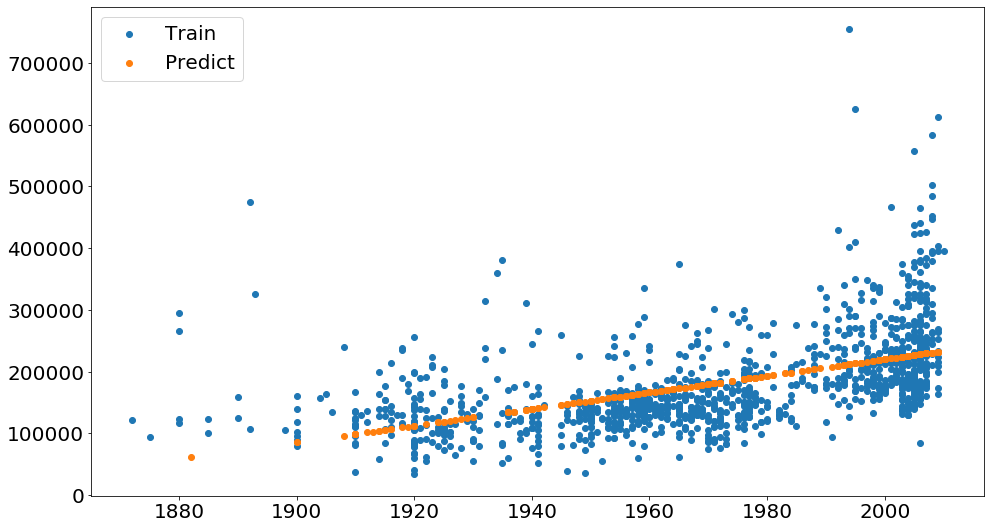

In [174]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

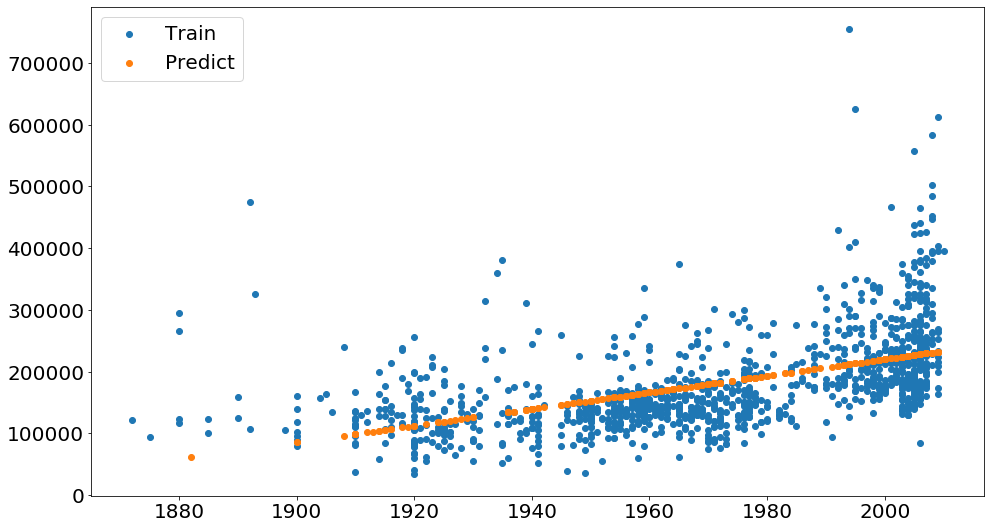

In [173]:
l_regressor_1 = LinearRegression()
l_regressor_1.fit(X_train,y_train)
y_pred_1 = l_regressor_1.predict(X_test)
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred_1,label="Predict")
plt.legend()
plt.plot();

# PROBLEM 7

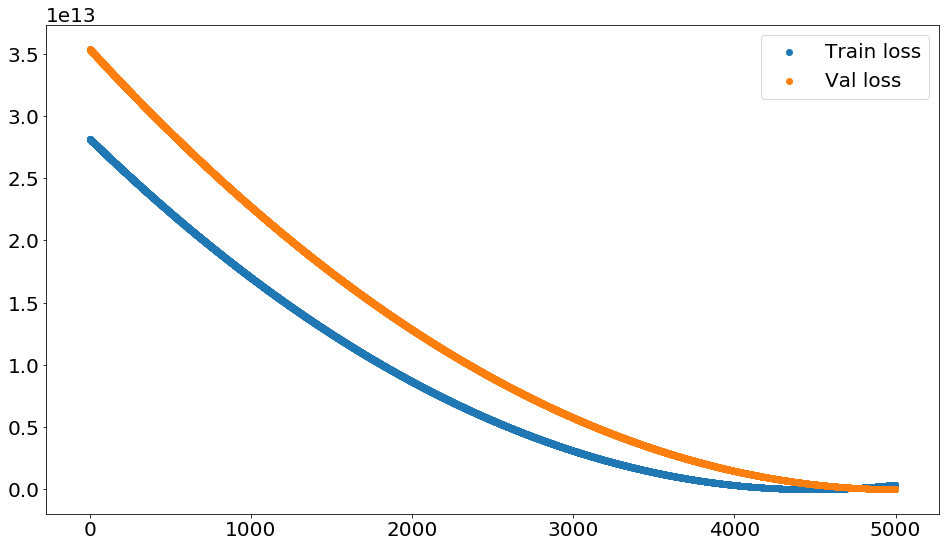

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=5000, lr=0.6, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(l_regressor.loss)),l_regressor.loss,label='Train loss')
plt.scatter(range(len(l_regressor.val_loss)),l_regressor.val_loss,label='Val loss')
plt.legend()
plt.plot();

# PROBLEM 8

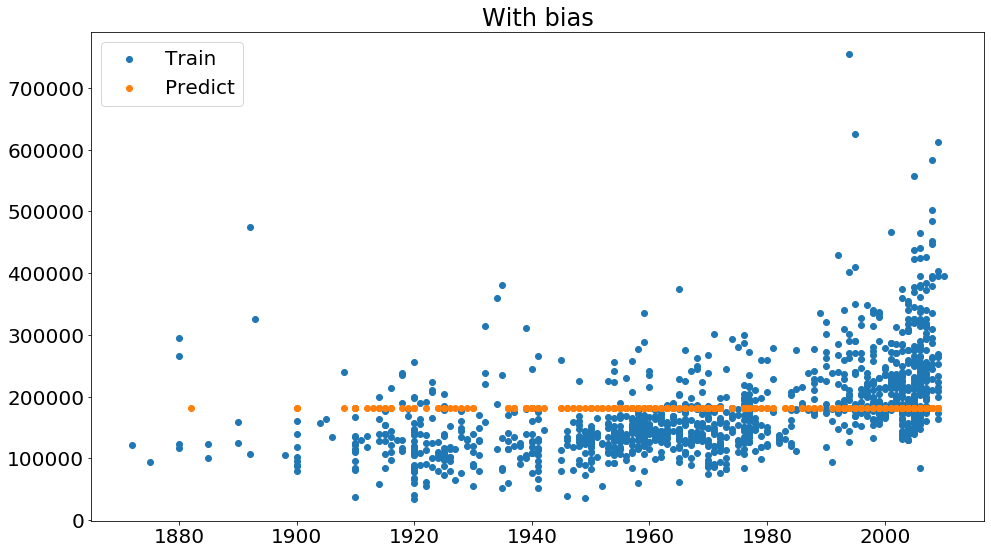

In [264]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=False, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("With bias")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

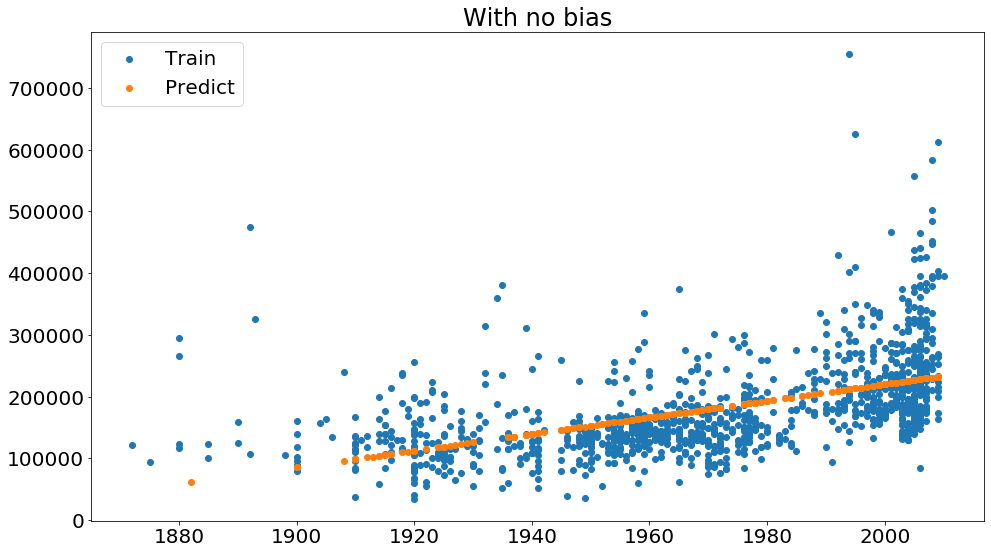

In [281]:
l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("With no bias")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

The **Bias** affects the predictions

# PROBLEM 9

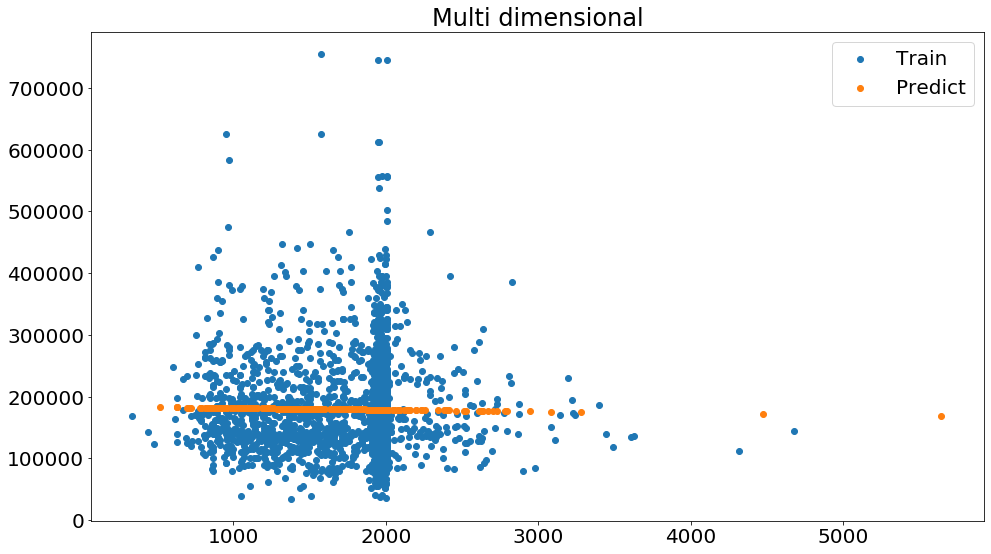

In [209]:
# separating them into variables
X = cleaned_df[['YearBuilt','GrLivArea']].values
y = cleaned_df[['SalePrice']].values
y = np.resize(y,X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("Multi dimensional")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();

The data are scattered in one place

# PROBLEM 10

Derivation of update formula

J(θ)=1/2mΣ(θx-y)^2 
= 1/2mΣ((xθ)^2 -2yxθ +y^2)

devide the derivatives
ΔJ(θ)/Δθ

After that 
= 1/2mΣ(2x^2θ -2yx)
= 1/mΣ x(xθ -y)

# PROBLEM 11

It is possible to find the optimum solution, where gradient descent will be equal to zero but depending on what you are working with you might have many upward and downward and when you reach a low point doesn't necessarly mean you have the optimum solution 

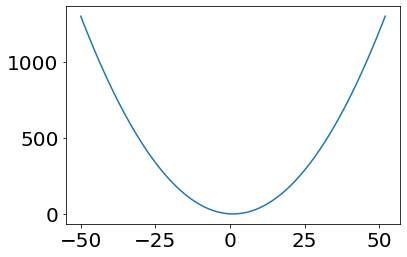

In [221]:
numbers = np.arange(-50,53,1)
equ = 1/2*(numbers-1)**2
plt.plot(numbers,equ);